In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
train = pd.read_csv(r'D:\data analysis excel\Data science bilarabi\Titanic - Machine Learning from Disaster\train.csv')
test = pd.read_csv(r'D:\data analysis excel\Data science bilarabi\Titanic - Machine Learning from Disaster\test.csv')


In [34]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
nu = train.isnull().sum()

<Axes: >

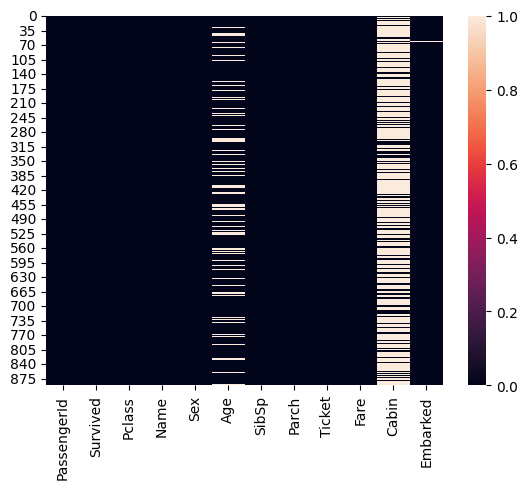

In [37]:
#لمعرفة هل البيانات ناقصة ام لا عن طريق الرسم البياني
sns.heatmap(train.isnull())

In [42]:
# لمعرفة الاعمدة الناقصة للبيانات

nu[nu>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [45]:
#لان الكود حيتنفذ لاكتر من داتا سيت فقمنا كتبنا الكود في فينشن
def clean (d):

    d.drop(['Name','Cabin','Fare','Ticket','Embarked'],axis=1,inplace = True)

#drop لحذف البيانات
# axis=1 الحذف علي مستوي الاعمدة لان =1 اذا كان = 0 حيكون علي مستوي الصفوف
#inplace = True التنفيذ علي كافة البيانات

    d.Age=d.Age.fillna(d.Age.median()) #لملا البيانات الفارغة في عمود العمر 

#fillna دالة ملا الخانة الفارغة
#train.Age.median() لملا العمود الفارغ و تم استخدام الوسيط و يفضل ذالك في الاعمار ان تملا بدالة الوسيط



    d.dropna()  #لحذف السطور التي تحتوي علي خانة فارغة
    return d
    



In [47]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [48]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

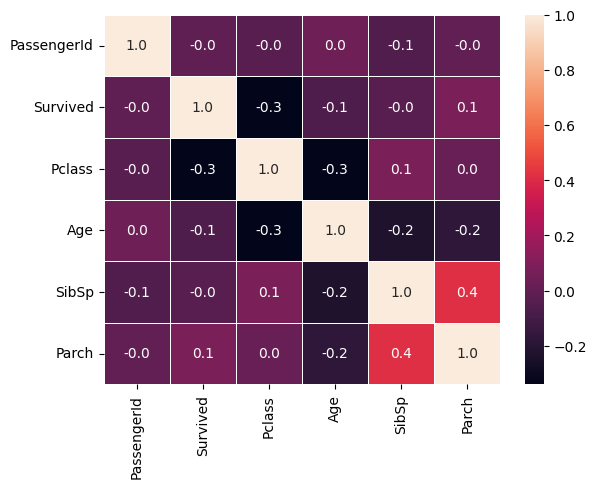

In [56]:
#لمعرفة العلاقة بين البيانات يتم استخدام الدالة
# corr دالة لمعرف العلاقة بين البيانات
#numeric_only=True حتي تنفذ علي البيانات الرقمية و الا سيطلع خطا

cora = train.corr(numeric_only=True)

sns.heatmap(cora, annot= True,fmt= '.1f', linewidths= .5)

#لاظهار المخطط البياني
# annot= True لاظهار العلاقة بالارقام
#fmt= '.1f' لتقريب العلامات العشرية
#linewidths= .5 لجعل مسافة بين المربعات

In [64]:
#معرفة كم واحد عاش و كم واحد مات

train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

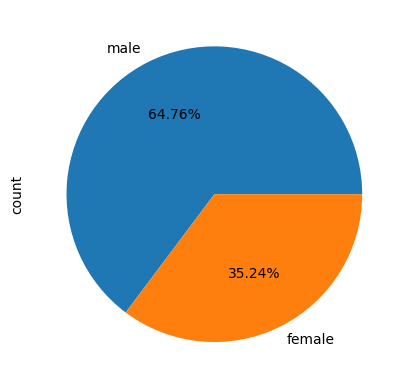

In [68]:
#لمعرفة عدد الركاب في طورتا

train.Sex.value_counts().plot.pie(autopct='%0.2f%%')
#لرسم الطورتا
# plot.pie دالة رسم الطورتا
#autopct='%0.2f' لكتابة الارقام داخل الطورتا
#autopct='%0.2f%%' يتم وضع علامتين في الماية في اخر رمز الكود حتي يتم تحويل الارقام الي في المية

<Axes: xlabel='Sex', ylabel='count'>

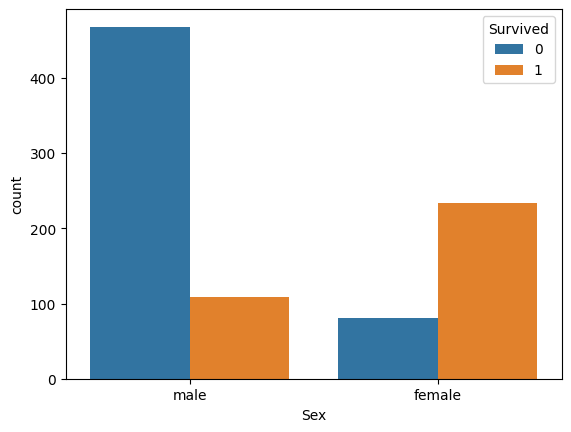

In [81]:
#لمعرفة نسبة الناجين من غير الناجين بناءا علي الاناث و الذكور

sns.countplot(x=train.Sex ,hue=train.Survived)

<Axes: xlabel='Pclass', ylabel='count'>

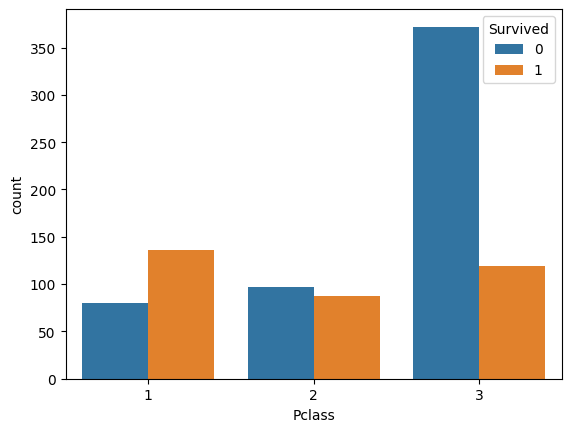

In [80]:
#لمعرفة نسبة الناجين من غير الناجين بناءا علي الكلاس

sns.countplot(x=train.Pclass ,hue=train.Survived)

<Axes: xlabel='Age', ylabel='Count'>

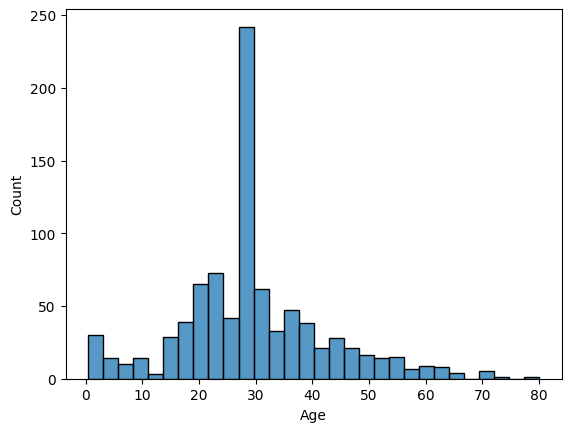

In [82]:
sns.histplot(train.Age)

In [101]:
from sklearn.preprocessing import LabelEncoder as lab

In [102]:
#اسناد القيم الحرفية لمتغير و الغير حرفية لمتغير
obj = train.select_dtypes(include='object')
non_obj = train.select_dtypes(exclude='object')

In [103]:
#تحويل البيانات الحرفية الي رقمية عن طريق دالة فوووور
for i in range(0,obj.shape[1]):  
    obj.iloc[ : , i] = lab.fit_transform(obj.iloc[ : , i], obj.iloc[ : , i])

In [104]:
#تجميع القيم المحولة من بيانات حرفية الؤي بيانات رقمية مع باقي البيانات

train= pd.concat([ obj, non_obj],axis = 1)
train

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,1,0,3,22.0,1,0
1,0,2,1,1,38.0,1,0
2,0,3,1,3,26.0,0,0
3,0,4,1,1,35.0,1,0
4,1,5,0,3,35.0,0,0
...,...,...,...,...,...,...,...
886,1,887,0,2,27.0,0,0
887,0,888,1,1,19.0,0,0
888,0,889,0,3,28.0,1,2
889,1,890,1,1,26.0,0,0


In [105]:
#اسناد القيم الحرفية لمتغير و الغير حرفية لمتغير
obj_test = test.select_dtypes(include='object')
non_obj_test =test.select_dtypes(exclude='object')

In [106]:
#تحويل البيانات الحرفية الي رقمية عن طريق دالة فوووور
for i in range(0,obj_test.shape[1]):  
    obj_test.iloc[ : , i] = lab.fit_transform(obj_test.iloc[ : , i], obj_test.iloc[ : , i])

In [107]:
#تجميع القيم المحولة من بيانات حرفية الؤي بيانات رقمية مع باقي البيانات

test= pd.concat([ obj_test, non_obj_test],axis = 1)
test

,Sex,PassengerId,Pclass,Age,SibSp,Parch
0,1,892,3,34.5,0,0
1,0,893,3,47.0,1,0
2,1,894,2,62.0,0,0
3,1,895,3,27.0,0,0
4,0,896,3,22.0,1,1
...,...,...,...,...,...,...
413,1,1305,3,27.0,0,0
414,0,1306,1,39.0,0,0
415,1,1307,3,38.5,0,0
416,1,1308,3,27.0,0,0


In [108]:
x=train.drop(['Survived'],axis = 1)
y=train['Survived']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .8)

In [110]:
#def all(model):
    #model = DecisionTreeClassifier()
   #pre=model.predict(x_test)
   # print(confusion_matrix(pre,y_test))
    #print(classification_report(pre,y_test))

In [116]:
#model1= KNeighborsClassifier()
#all(model1)

[[80 45]
 [36 18]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       125
           1       0.29      0.33      0.31        54

    accuracy                           0.55       179
   macro avg       0.49      0.49      0.49       179
weighted avg       0.57      0.55      0.56       179



In [117]:
#modell = DecisionTreeClassifier()    
#modell.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
#pr = modell.predict(x_test)

In [120]:
#accuracy_score(pr,y_test)

0.7653631284916201

In [121]:
accuracies = []

In [122]:
def all(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(pre,y_test)
    print('Accuracy = ' , accuracy )
    accuracies.append(accuracy)

In [123]:
model1 = LogisticRegression()
all(model1)

Accuracy =  0.8212290502793296


C:\Users\Fathelrhman Mohammed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
model2 = RandomForestClassifier()
all(model2)

Accuracy =  0.8324022346368715


In [125]:
model3= GradientBoostingClassifier()
all(model3)

Accuracy =  0.8435754189944135


In [126]:
model4= DecisionTreeClassifier()
all(model4)

Accuracy =  0.8212290502793296


In [127]:
model5=KNeighborsClassifier()
all(model5)

Accuracy =  0.547486033519553


In [128]:
model6= GaussianNB()
all(model6)

Accuracy =  0.7988826815642458


In [129]:
model7=SVC()
all(model7)

Accuracy =  0.6480446927374302


In [130]:
Algorithms =['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [131]:
new = pd.DataFrame({'Algorithms':Algorithms,'Accuracies':accuracies})

In [132]:
new

,Algorithms,Accuracies
0,LogisticRegression,0.821229
1,RandomForestClassifier,0.832402
2,GradientBoostingClassifier,0.843575
3,DecisionTreeClassifier,0.821229
4,KNeighborsClassifier,0.547486
5,GaussianNB,0.798883
6,SVC,0.648045


In [133]:
modelx=GradientBoostingClassifier()        
modelx.fit(x_train,y_train)

GradientBoostingClassifier()

In [134]:
lpre=modelx.predict(test)

In [135]:
final=test.PassengerId

In [136]:
new_dataframe = pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [138]:
new_dataframe.to_csv(r'D:\data analysis excel\Data science bilarabi\Titanic - Machine Learning from Disaster\Submission.csv',index = False)